# Set-up

In [27]:
# --- Standard library ---
import sys
from ast import literal_eval as literal

# --- Scientific computing ---
import numpy as np
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import roc_curve

# --- Network science ---
# import networkx as nx

# --- Data handling and visualization ---
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# --- Project source code ---
sys.path.append("../../src/")

# from classifiers.features import get_degrees, get_configuration_probabilities_feature
# from classifiers.features import get_distances, get_configuration_distances_feature, get_distance_ratios_feature
# from classifiers.features import get_labels, format_feature_matrix
# from classifiers.logreg import *
# from data.observations import get_preprocessed_data

In [28]:
metadata = {
    "PROJECT_ID": "EMB_ex30",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v1.2.1",
    "DATE": "20230406"
}
TAG = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

df = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")

In [29]:
df = df.replace({
    "{'emb_c'}": "Embedding",
    "{'imb', 'emb_c'}": "Intercept + Embedding",
    "{'emb_c', 'imb'}": "Intercept + Embedding",
    "{'emb_c', 'deg'}": "Embedding + Degree",
    "{'deg', 'emb_c'}": "Embedding + Degree",
    "{'imb', 'emb_c', 'deg'}": "Intercept + Embedding + Degree",
    "{'emb_c', 'deg', 'imb'}": "Intercept + Embedding + Degree",
    "{'deg', 'imb', 'emb_c'}": "Intercept + Embedding + Degree",
})

# Performance analysis

<Figure size 432x288 with 0 Axes>

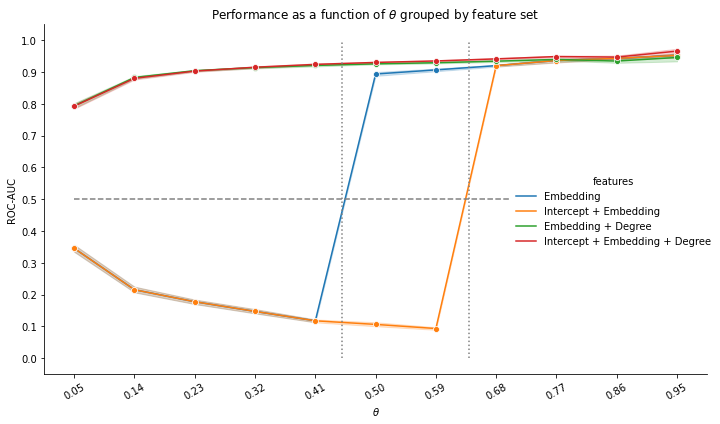

In [30]:
# Instantiate figure, subset relevant data
plt.figure()
BOX = [(0,0),(1,1)]  # lower left, upper right

# Plotting data
sns.relplot(
    data=df, kind="line",
    x="theta", y="auroc",
    hue="features",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.7, linestyles="dashed", colors="gray")
plt.vlines([0.45, 0.64], BOX[0][1], BOX[1][1], linestyles="dotted", colors="gray")

plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Performance as a function of $\\theta$ grouped by feature set")

# Save plot
plt.tight_layout()
# plt.savefig(f"../../results/plots/line_auroc-pfi_imb-emb-r-deg_{TAG}.png", facecolor="white", transparent=False)

<Figure size 432x288 with 0 Axes>

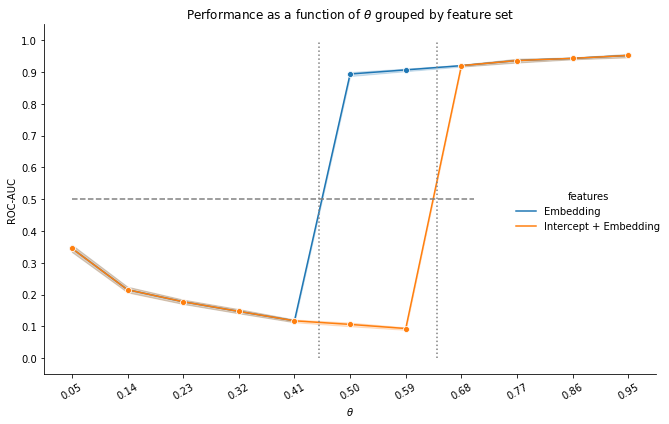

<Figure size 432x288 with 0 Axes>

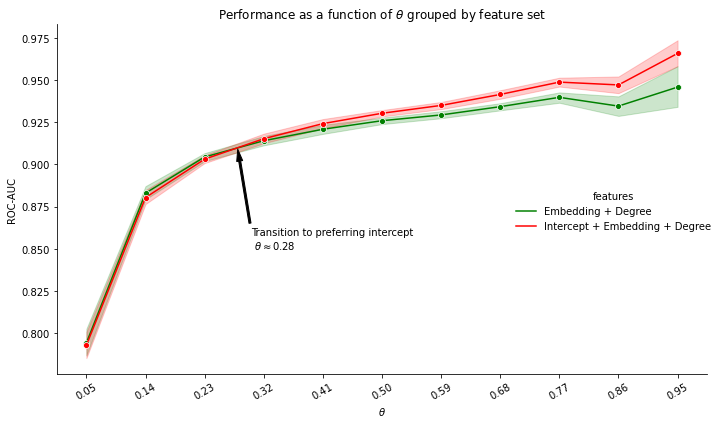

In [31]:
# Instantiate figure, subset relevant data
plt.figure()
BOX = [(0,0),(1,1)]  # lower left, upper right

# Plotting data
sns.relplot(
    data=df.loc[~df.features.str.contains("Degree")], kind="line",
    x="theta", y="auroc",
    hue="features",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.7, linestyles="dashed", colors="gray")
plt.vlines([0.45, 0.64], BOX[0][1], BOX[1][1], linestyles="dotted", colors="gray")

plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Performance as a function of $\\theta$ grouped by feature set")

# Save plot
plt.tight_layout()

# ==============================================================================

# Instantiate figure, subset relevant data
plt.figure()
BOX = [(0,0.5),(1,1)]  # lower left, upper right

# Plotting data
sns.relplot(
    data=df.loc[df.features.str.contains("Degree")], kind="line",
    x="theta", y="auroc",
    hue="features", palette=["green", "red"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
# plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
# plt.vlines([0.45, 0.64], BOX[0][1], BOX[1][1], linestyles="dotted", colors="gray")

plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


# plt.yticks(np.linspace(0.4, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Performance as a function of $\\theta$ grouped by feature set")

plt.annotate(
    "Transition to preferring intercept\n $\\theta \\approx 0.28$",
    xy=(0.28, 0.91), xytext=(0.3, .85),
    arrowprops={
        "facecolor": 'black',
        "shrink": 0.02,
        "width": 2,
        "headwidth": 6
    },
    size="10"
)

# Save plot
plt.tight_layout()

# Coefficient analysis

## Without degrees

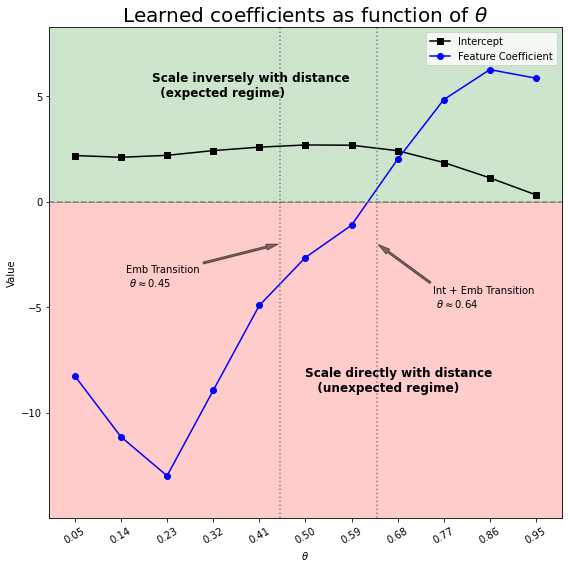

In [43]:
# Instantiate figure, subset relevant data
plt.figure(figsize=(8,8))
ftr = "Intercept + Embedding"
df_ = df.query("features == @ftr")

X = [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])]
Y_INT = df_["intercept"][::10]
Y_COEF = [
    literal(x)[0]
    for x in df_["coefficients"]
][::10]

BOX = [(0,min(Y_COEF)-2),(1,max(Y_COEF)+2)]  # lower left, upper right

# Plotting data
plt.plot(
    X, Y_INT,
    label="Intercept",
    color="black",
    marker="s"
)
plt.plot(
    X, Y_COEF,
    label="Feature Coefficient",
    color="blue",
    marker="o"
)

# Axes configuration
plt.hlines(0.0, BOX[0][0], BOX[1][0], linestyles="dashed", colors="gray")
plt.vlines([0.45, 0.64], BOX[0][1], BOX[1][1], linestyles="dotted", colors="gray")

plt.xticks(X, rotation=30)
plt.xlabel("$\\theta$")

plt.ylabel("Value")

# Figure-level attributes
plt.title("Learned coefficients as function of $\\theta$", fontdict={"size": 20})
plt.legend()
plt.xlim(BOX[0][0],BOX[1][0])
plt.ylim(BOX[0][1], BOX[1][1])

plt.annotate(
    "Int + Emb Transition\n $\\theta \\approx 0.64$",
    xy=(0.64, -2), xytext=(0.75, -5),
    arrowprops={
        "facecolor": 'black',
        "shrink": 0.02,
        "width": 2,
        "headwidth": 6,
        "alpha": 0.5
    },
    size="10"
)
plt.annotate(
    "Emb Transition\n $\\theta \\approx 0.45$",
    xy=(0.45, -2), xytext=(0.15, -4),
    arrowprops={
        "facecolor": 'black',
        "shrink": 0.02,
        "width": 2,
        "headwidth": 6,
        "alpha": 0.5
    },
    size="10"
)
plt.fill_between(np.linspace(BOX[0][0], BOX[1][0]), 0, BOX[0][1], color="red", alpha=0.2)
plt.fill_between(np.linspace(BOX[0][0], BOX[1][0]), 0, BOX[1][1], color="green", alpha=0.2)
plt.text(0.2, 5, "Scale inversely with distance\n  (expected regime)", fontdict={"size": 12, "weight": "bold"})
plt.text(0.5, -9, "Scale directly with distance\n   (unexpected regime)", fontdict={"size": 12, "weight": "bold"})

# Save plot
plt.tight_layout()

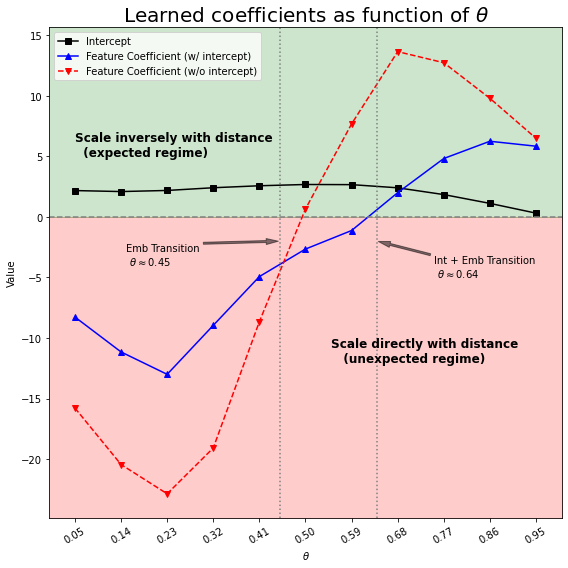

In [44]:
# Instantiate figure, subset relevant data
plt.figure(figsize=(8,8))
ftr_ = "Embedding"
df__ = df.query("features == @ftr_")

Y_INT_ = df__["intercept"][::10]
Y_COEF_ = [
    literal(x)[0]
    for x in df__["coefficients"]
][::10]

BOX = [(0,min(Y_COEF_)-2),(1,max(Y_COEF_)+2)]  # lower left, upper right

# Plotting data
plt.plot(
    X, Y_INT,
    label="Intercept",
    color="black",
    marker="s"
)
plt.plot(
    X, Y_COEF,
    label="Feature Coefficient (w/ intercept)",
    color="blue",
    marker="^"
)
plt.plot(
    X, Y_COEF_,
    label="Feature Coefficient (w/o intercept)",
    color="red",
    linestyle="dashed",
    marker="v"
)

# Axes configuration
plt.hlines(0.0, BOX[0][0], BOX[1][0], linestyles="dashed", colors="gray")
plt.vlines([0.45, 0.64], BOX[0][1], BOX[1][1], linestyles="dotted", colors="gray")

plt.xticks(X, rotation=30)
plt.xlabel("$\\theta$")

plt.ylabel("Value")

# Figure-level attributes
plt.title("Learned coefficients as function of $\\theta$", fontdict={"size": 20})
plt.legend()
plt.xlim(BOX[0][0],BOX[1][0])
plt.ylim(BOX[0][1], BOX[1][1])

plt.annotate(
    "Int + Emb Transition\n $\\theta \\approx 0.64$",
    xy=(0.64, -2), xytext=(0.75, -5),
    arrowprops={
        "facecolor": 'black',
        "shrink": 0.02,
        "width": 2,
        "headwidth": 6,
        "alpha": 0.5
    },
    size="10"
)
plt.annotate(
    "Emb Transition\n $\\theta \\approx 0.45$",
    xy=(0.45, -2), xytext=(0.15, -4),
    arrowprops={
        "facecolor": 'black',
        "shrink": 0.02,
        "width": 2,
        "headwidth": 6,
        "alpha": 0.5
    },
    size="10"
)
plt.fill_between(np.linspace(BOX[0][0], BOX[1][0]), 0, BOX[0][1], color="red", alpha=0.2)
plt.fill_between(np.linspace(BOX[0][0], BOX[1][0]), 0, BOX[1][1], color="green", alpha=0.2)
plt.text(0.05, 5, "Scale inversely with distance\n  (expected regime)", fontdict={"size": 12, "weight": "bold"})
plt.text(0.55, -12, "Scale directly with distance\n   (unexpected regime)", fontdict={"size": 12, "weight": "bold"})

# Save plot
plt.tight_layout()

## With degrees

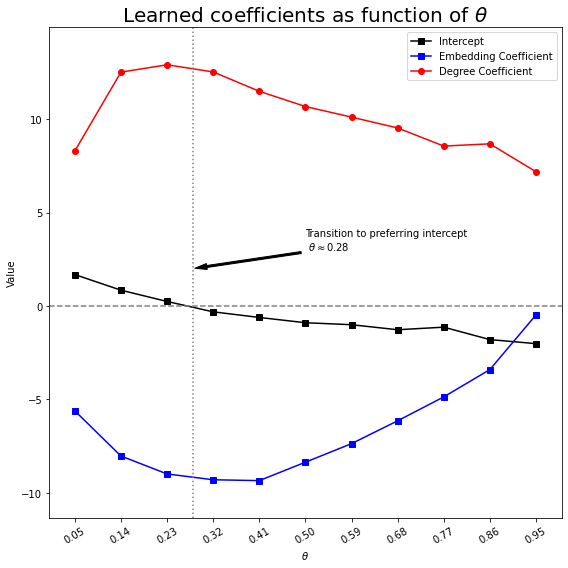

In [38]:
# Instantiate figure, subset relevant data
plt.figure(figsize=(8,8))
ftr = "Intercept + Embedding + Degree"
df_ = df.query("features == @ftr")

X = [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])]
Y_ = [
    [y for y in x.lstrip("[").rstrip(" ]").strip().split(" ") if y != '']
    for x in df_["coefficients"]
]
Y_INT = df_["intercept"][::10]
Y_EMB = [float(y[0]) for y in Y_][::10]
Y_DEG = [float(y[-1]) for y in Y_][::10]


BOX = [(0,min(min(Y_EMB), min(Y_DEG))-2),(1,max(max(Y_EMB), max(Y_DEG))+2)]  # lower left, upper right

# Plotting data
plt.plot(
    X, Y_INT,
    label="Intercept",
    color="black",
    marker="s"
)
plt.plot(
    X, Y_EMB,
    label="Embedding Coefficient",
    color="blue",
    marker="s"
)
plt.plot(
    X, Y_DEG,
    label="Degree Coefficient",
    color="red",
    marker="o"
)

# Axes configuration
plt.hlines(0.0, BOX[0][0], BOX[1][0], linestyles="dashed", colors="gray")
plt.vlines(0.28, BOX[0][1], BOX[1][1], linestyles="dotted", colors="gray")

plt.xticks(X, rotation=30)
plt.xlabel("$\\theta$")

plt.ylabel("Value")

# Figure-level attributes
plt.title("Learned coefficients as function of $\\theta$", fontdict={"size": 20})
plt.legend()
plt.xlim(BOX[0][0],BOX[1][0])
plt.ylim(BOX[0][1], BOX[1][1])

plt.annotate(
    "Transition to preferring intercept\n $\\theta \\approx 0.28$",
    xy=(0.28, 2), xytext=(0.5, 3),
    arrowprops={
        "facecolor": 'black',
        "shrink": 0.02,
        "width": 2,
        "headwidth": 6
    },
    size="10"
)

# Save plot
plt.tight_layout()

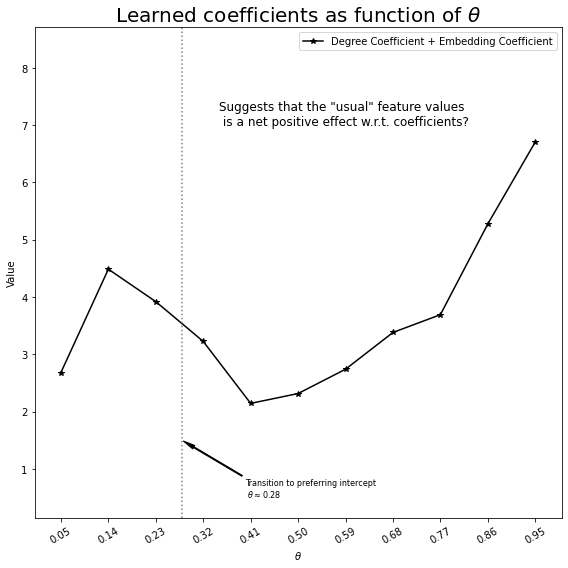

In [41]:
# Instantiate figure, subset relevant data
plt.figure(figsize=(8,8))

DELTA_Y = np.array(Y_DEG) + np.array(Y_EMB)  # added since Y_EMB < 0 at all x

BOX = [(0,min(DELTA_Y)-2),(1,max(DELTA_Y)+2)]  # lower left, upper right

# Plotting data
plt.plot(
    X, DELTA_Y,
    label="Degree Coefficient + Embedding Coefficient",
    color="black",
    marker="*"
)

# Axes configuration
# plt.hlines(0.0, BOX[0][0], BOX[1][0], linestyles="dashed", colors="gray")
plt.vlines(0.28, BOX[0][1], BOX[1][1], linestyles="dotted", colors="gray")

plt.xticks(X, rotation=30)
plt.xlabel("$\\theta$")

plt.ylabel("Value")

# Figure-level attributes
plt.title("Learned coefficients as function of $\\theta$", fontdict={"size": 20})
plt.legend()
plt.xlim(BOX[0][0],BOX[1][0])
plt.ylim(BOX[0][1], BOX[1][1])

plt.annotate(
    "Transition to preferring intercept\n $\\theta \\approx 0.28$",
    xy=(0.28, 1.5), xytext=(0.4, 0.5),
    arrowprops={
        "facecolor": 'black',
        "shrink": 0.02,
        "width": 1,
        "headwidth": 4
    },
    size="8"
)
plt.text(
    0.35, 7,
    "Suggests that the \"usual\" feature values\n is a net positive effect w.r.t. coefficients?",
    fontdict={"size": 12}
)

# Save plot
plt.tight_layout()

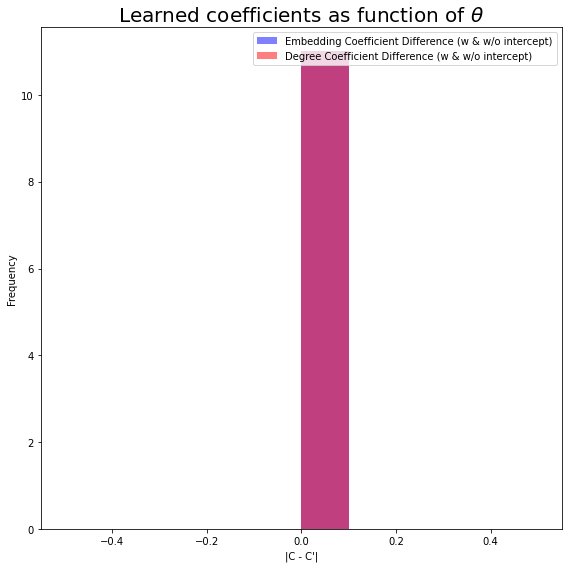

In [40]:
# Instantiate figure, subset relevant data
plt.figure(figsize=(8,8))
ftr_ = "Embedding + Degree"
df__ = df.query("features == @ftr")

Y__ = [
    [y for y in x.lstrip("[").rstrip(" ]").strip().split(" ") if y != '']
    for x in df__["coefficients"]
]
Y_EMB_ = [float(y[0]) for y in Y__][::10]
Y_DEG_ = [float(y[-1]) for y in Y__][::10]

DELTA_EMB = np.array(Y_EMB) - np.array(Y_EMB_) + 1e-12
DELTA_DEG = np.array(Y_DEG) - np.array(Y_DEG_) + 1e-12

# Plotting data
plt.hist(
    DELTA_EMB,
    label="Embedding Coefficient Difference (w & w/o intercept)",
    color="blue",
    alpha=0.5,
)
plt.hist(
    DELTA_DEG,
    label="Degree Coefficient Difference (w & w/o intercept)",
    color="red",
    alpha=0.5
)

# Axes configuration
# plt.xticks(X, rotation=30)
plt.xlabel("|C - C'|")

plt.ylabel("Frequency")

# Figure-level attributes
plt.title("Learned coefficients as function of $\\theta$", fontdict={"size": 20})
plt.legend()

# Save plot
plt.tight_layout()